In [1]:
# Import the required libraries and dependencies
import pandas as pd 
import numpy as np 
from pathlib import Path 


In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv(
    Path("../Quantitative_Analysis/Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True)

whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = whale_navs_df.pct_change().dropna()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

<AxesSubplot:title={'center':'4 funds and sp500'}, xlabel='date'>

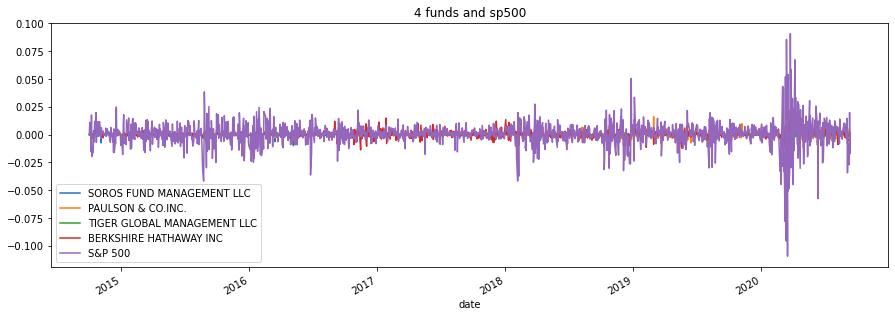

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(15,5), title="4 funds and sp500")


In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1+daily_returns).cumprod()
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'cumulative returns'}, xlabel='date'>

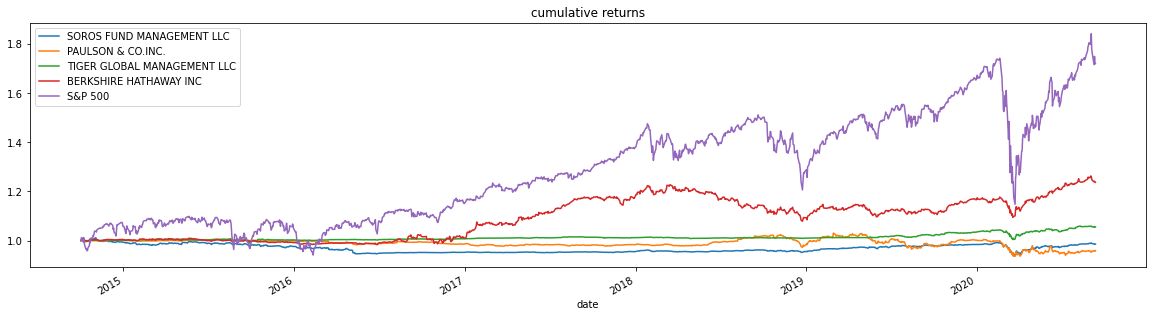

In [6]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(20,5), title="cumulative returns")


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** We can see that the sp500 remains above the rest of the other funds and the closest that gets to sp500 is Berkshire Hathaway Inc but still remains below. 

---

<AxesSubplot:title={'center':'volatility of funds and sp500'}>

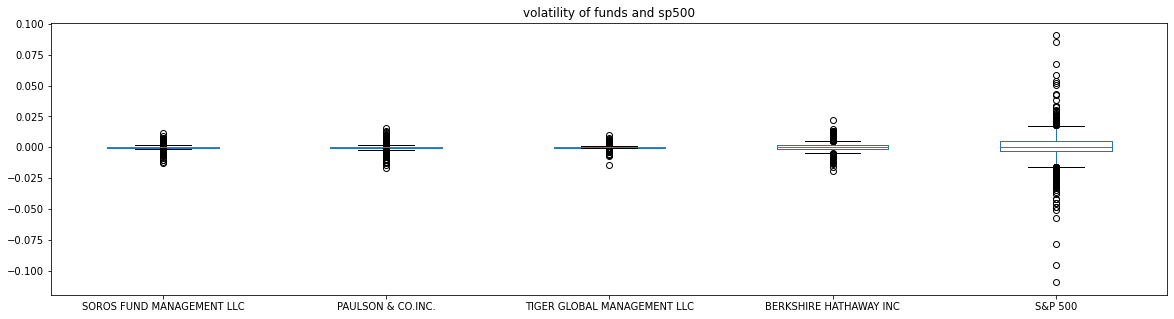

In [7]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(figsize=(20,5), title="volatility of funds and sp500", kind="box")


<AxesSubplot:title={'center':'funds volatility'}>

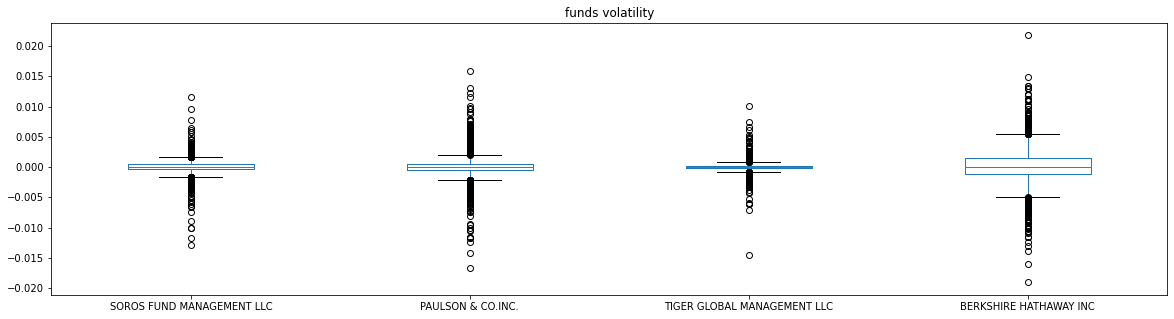

In [8]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
funds_daily_returns = daily_returns.drop(columns="S&P 500")
funds_daily_returns.plot(figsize=(20,5), title="funds volatility", kind="box")

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** As we can see in the picture the biggest spread/volatility is in Berkshire Hathaway Inc and the smallest is in Tiger Global Management LLC.

---

In [9]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviation = daily_returns.std().sort_values()
standard_deviation

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [10]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
standard_deviation_yearly = (standard_deviation * np.sqrt(252)).sort_values()
standard_deviation_yearly

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Rolling 21 day window with standard diviation'}, xlabel='date'>

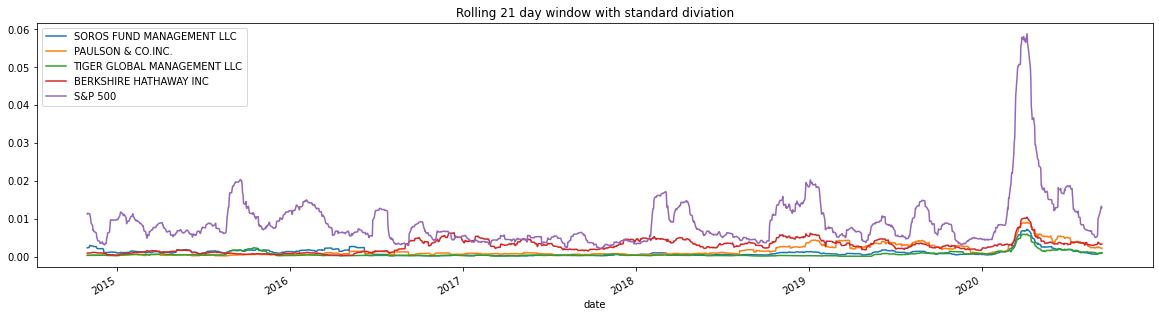

In [11]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(figsize=(20,5), title="Rolling 21 day window with standard diviation")


<AxesSubplot:title={'center':'Rolling 21 day window with standard diviation only on funds'}, xlabel='date'>

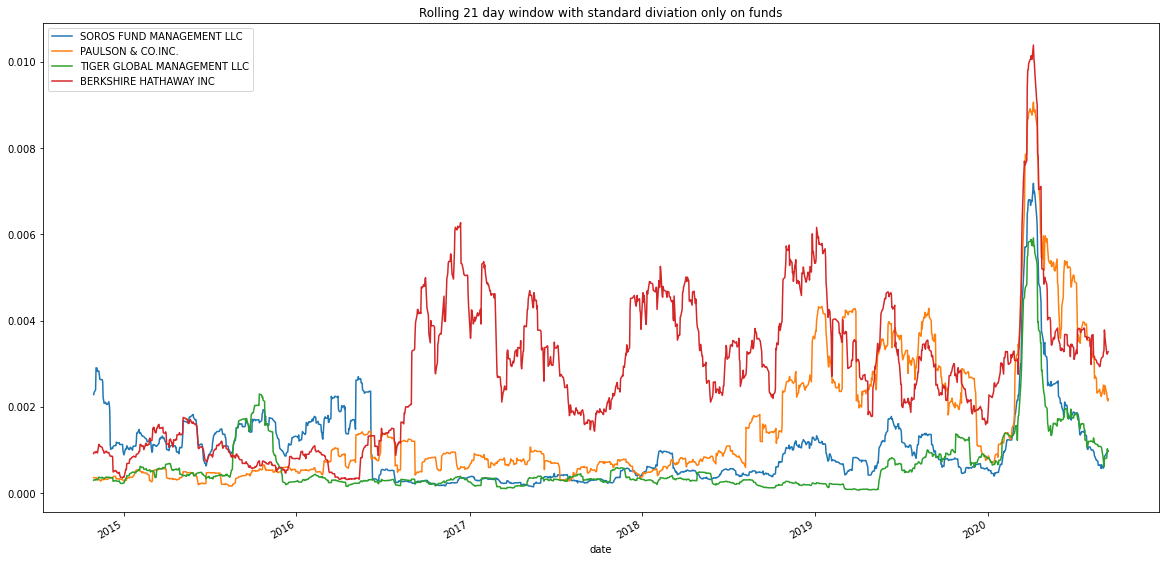

In [12]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
funds_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling 21 day window with standard diviation only on funds")


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** The funds of Paulson & CO.INC. and Berkshire Hathaway INC.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Seems to follow all the funds to the sp500 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Paulson fund has the biggest risk for a moment in 2020 we can see that the other catch up to him but defenetly Paulson fund has the biggest risk over time. 

---

In [13]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annual_average_return = (daily_returns.mean()*252).sort_values()
annual_average_return

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [14]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios = (annual_average_return / standard_deviation_yearly).sort_values()
sharpe_ratios

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Funds and SP500'}>

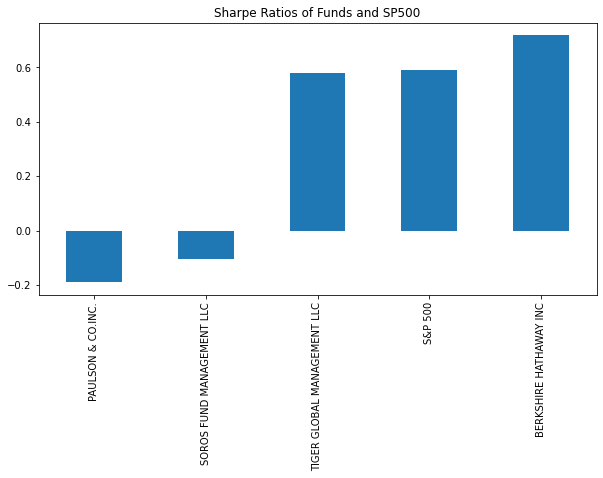

In [15]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(figsize=(10,5), title="Sharpe Ratios of Funds and SP500", kind="bar")


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # The best are (Berkshire) on the mid position (SP500 and Tiger Global Managment LLC) and the less profitable are (Paulson and soros fund managment llc)

---

In [16]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
SP500_var_60_day = daily_returns["S&P 500"].rolling(window=60).var()
SP500_var_60_day.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [17]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
berkshire_SP500_covariance = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returns["S&P 500"].rolling(window=60))
berkshire_SP500_covariance.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [18]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_60_day_rolling_beta = berkshire_SP500_covariance / SP500_var_60_day
berkshire_60_day_rolling_beta.tail()


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [19]:
# Calculate the average of the 60-day rolling beta
berkshire_60_day_rolling_beta.mean()


0.2214986101354593

<AxesSubplot:title={'center':'Rolling 60 day beta'}, xlabel='date'>

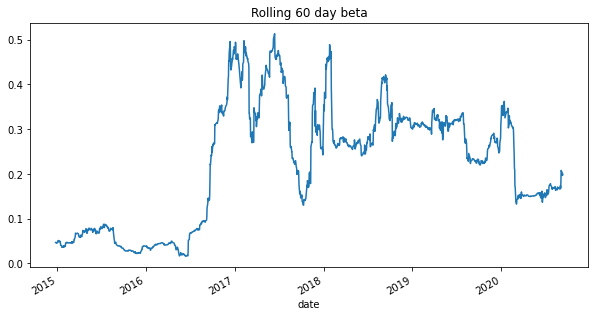

In [20]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_60_day_rolling_beta.plot(figsize=(10,5), title="Rolling 60 day beta")


In [21]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_SP500_covariance = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P 500"].rolling(window=60))
tiger_SP500_covariance.tail()


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [22]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_60_day_rolling_beta = tiger_SP500_covariance / SP500_var_60_day
tiger_60_day_rolling_beta.tail()


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [23]:
# Calculate the average of the 60-day rolling beta
tiger_60_day_rolling_beta.mean()

0.03093001487238774

<AxesSubplot:title={'center':'60-day Rolling Beta for Tiger compared to the S&P 500'}, xlabel='date'>

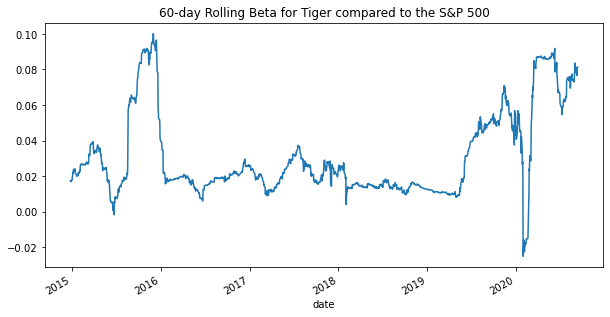

In [24]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_60_day_rolling_beta.plot(figsize=(10,5), title="60-day Rolling Beta for Tiger compared to the S&P 500")

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Defenetly we can see and appreciate that the Berkshir Hathaway is more sensitive. 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # Base on risk reward the fund  Berkshir Hathaway will be our recomended investment  

---